In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [136]:
all_data = pd.read_csv('creditcard.csv',sep=',')

(284807, 31)

In [ ]:
#Display the five first rows

In [18]:
all_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
#Let's check if all variable are type float/int

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
### After checking variables types  now we need to varify is there any null/empty varialbes

In [29]:
all_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [30]:
# as it show there no null variable or a blanket one

In [31]:
# Next step consist of Data exploration -- Let's distribution of class with the bar plot

In [32]:
# first let's split class column into two types : fraud and non fraud

In [137]:
all_data.shape

(284807, 31)

In [39]:
my_class = all_data["Class"]

In [50]:
Fraud = my_class.values[my_class==1]
Non_Fraud = my_class.values[my_class==0]

In [73]:
Fraud.reshape((1,Fraud.shape[0]))
Fraud.shape

(492,)

In [74]:
Non_Fraud.reshape((1,Non_Fraud.shape[0]))
Non_Fraud.shape

(284315,)

In [76]:
Fraud.shape

(492,)

In [77]:
# now let's make a Bar plot to see the distribution 

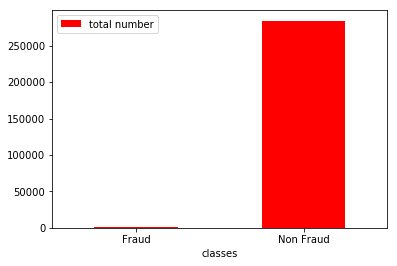

In [104]:
df = pd.DataFrame({'classes':["Fraud",'Non Fraud'],'total number':[Fraud.shape[0],Non_Fraud.shape[0]]})
ax = df.plot.bar(x='classes', y='total number', rot=0 , color="red")
#ax.Figure();

In [122]:
# let's analyse more about this distribution of fraud detection

In [124]:
fraud = all_data[all_data['Class']==1]

non_fraud = all_data[all_data['Class']==0]

In [ ]:
## let's vizualate the amount of fraudement  during time  with a scatter

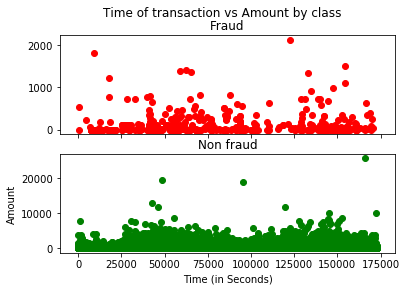

In [130]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color="red")
ax1.set_title('Fraud')
ax2.scatter(non_fraud.Time, non_fraud.Amount , color="green")
ax2.set_title('Non fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [133]:
# the amount of data in the csv file is huge. so to train the model 
#and analyse the whole data  we are going to take sample of 10% from the global data


In [138]:
## Take some sample of the data

sample_data= all_data.sample(frac = 0.1,random_state=1)

sample_data.shape

(28481, 31)

In [246]:
#let's split again our data into fraud and non fraud

Fraud = sample_data[sample_data['Class']==1]

Non_fraud = sample_data[sample_data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Non_fraud))

In [247]:
#the fraud represent only 0.1% of the non fraud transaction 
outlier_fraction

0.0017234102419808666

In [143]:
print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))


Fraud Cases : 49
Valid Cases : 28432


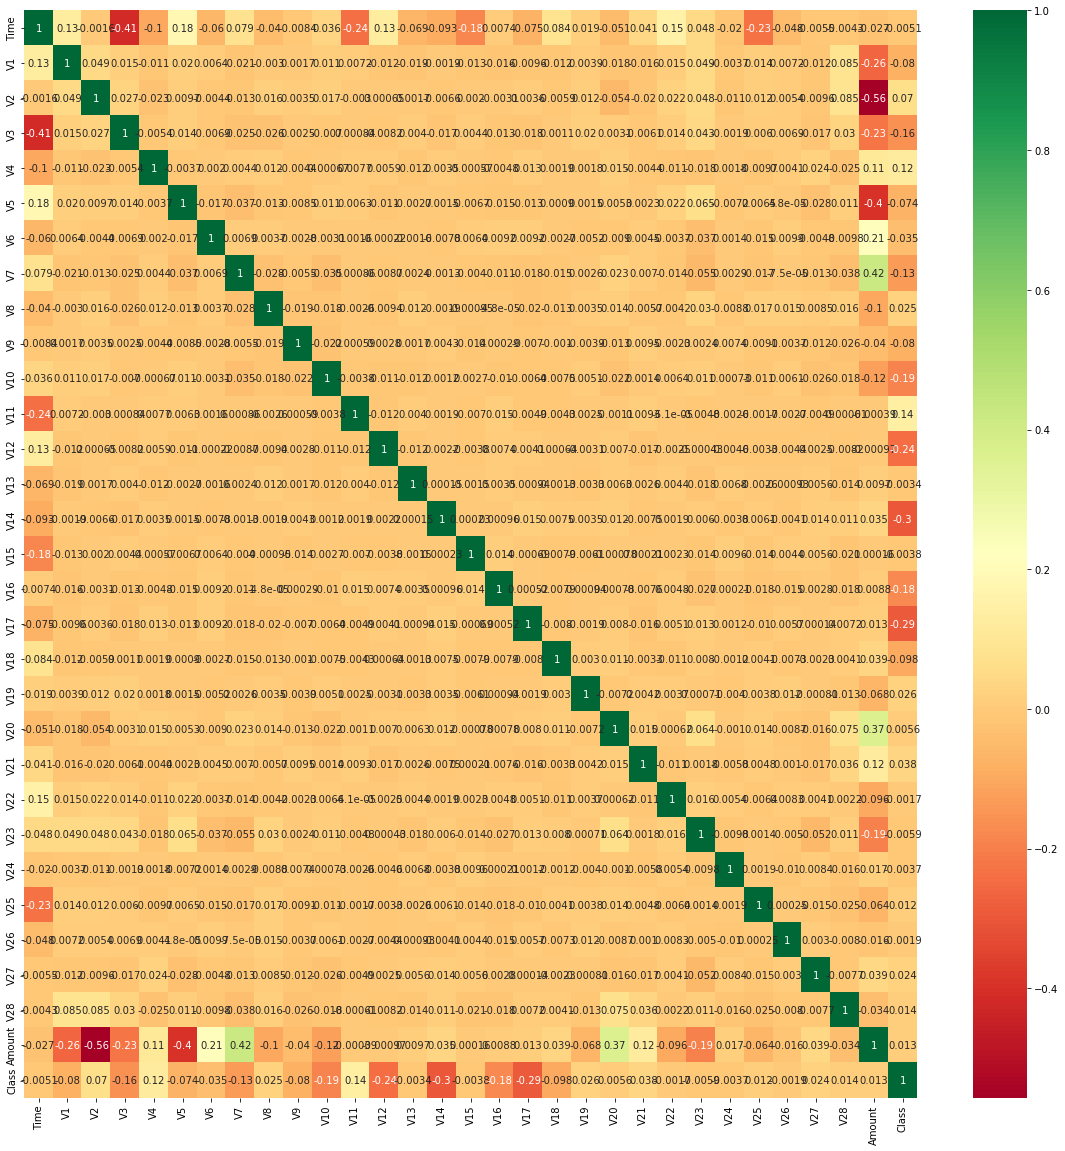

In [160]:
#let's observe the correlations of each features in dataset

import seaborn as sns
plt.figure(figsize=(20,20))
corr = sample_data.corr()
corr.style.background_gradient(cmap='coolwarm')
g=sns.heatmap(sample_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [161]:
#now it's time to split data into train and test dataset

In [237]:
X = sample_data.drop(['Class'] , axis=1)
y = sample_data['Class']

In [169]:
print("all features : ",X.shape)
print("target variable",y.shape)

all features :  (28481, 30)
target variable (28481,)


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [199]:
# Time to train our models for prediction data set
# we are going to implement the isolation forest machine learning solution and the SVM to detect the outlears 

In [242]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
state = np.random.RandomState(42)


In [281]:
model= IsolationForest(n_estimators=100, max_samples=len(X_train),contamination=outlier_fraction,random_state=state)
model.fit(X_train)
scores_prediction = model.decision_function(X_train)
y_pred = model.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [290]:
print("Accuracy Score :",accuracy_score(y_test, y_pred))
n_errors = (y_pred != y_test).sum()
print("l'erreur de ce model est de ",n_errors)
print(classification_report(y_test,y_pred))

Accuracy Score : 0.9968404423380727
l'erreur de ce model est de  18
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



In [ ]:
#nous avons donc une precision de 99,68% pour le model isolation forest

In [307]:
# voici au final notre matrrice de confusion
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'tf' is not defined